In [210]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [211]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [212]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [213]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [214]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [215]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [216]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [217]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [218]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [219]:
date_range_2016 = pd.date_range(start='2016-08-01', end='2016-08-07')
date_range_2017 = pd.date_range(start='2017-08-01', end='2017-08-07')

In [220]:
calc_temps_2016 = calc_temps('2016-08-01', '2016-08-07')
calc_temps_2016

[(72.0, 77.79545454545455, 83.0)]

In [221]:
calc_temps_2017 = calc_temps('2017-08-01', '2017-08-07')
calc_temps_2017

[(72.0, 79.25, 83.0)]

In [222]:
data = {'date': ['Aug 2016', 'Aug 2017'], 'Min Temp': [72.0, 72.0],
       'Avg Temp' : [77.79545454545455, 79.25], 'Max Temp' : [83.0, 83.0]}
time_df = pd.DataFrame(data=data)

time_df

,date,Min Temp,Avg Temp,Max Temp
0,Aug 2016,72.0,77.795455,83.0
1,Aug 2017,72.0,79.250000,83.0


In [223]:
peak_to_peak = 83.0 - 72.0
peak_to_peak

11.0

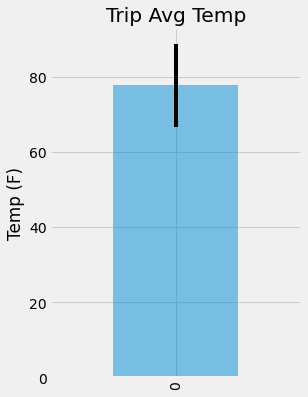

In [227]:
calc_temps_2016 = calc_temps('2016-08-01', '2016-08-07')
tavg = 77.79545454545455

tavg_df = pd.DataFrame(calc_temps_2016)
tavg_df[1].plot.bar(alpha=0.5, yerr = peak_to_peak, figsize=(4,6))
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.savefig("../SQLAlchemy-Challenge/Images/tripavgtemp.png")
plt.show()

### Daily Rainfall Average

In [235]:
# Calculate the total amount of rainfall per weather station for your trip dates 
#using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, 
# name, latitude, longitude, and elevation

sel = [Measurement.station, Station.name, Measurement.prcp, Station.latitude, Station.longitude, Station.elevation]
joined_list = session.query(*sel).filter(Measurement.station == Station.station).\
                filter(Measurement.date >= '2016-08-23').filter(Measurement.date <= '2017-08-23').\
                group_by(Measurement.station).\
                order_by(func.sum(Measurement.prcp).asc()).all()



In [233]:
joined_df = pd.DataFrame(joined_list)
joined_df = joined_df.dropna()
joined_df = joined_df.rename(columns={0 : 'Station', 1 : 'Name', 2 : 'Precipitation', 
                                     3 : 'Latitude', 4 : 'Longitude', 5 : 'Elevation'})

In [236]:
joined_df

,Station,Name,Precipitation,Latitude,Longitude,Elevation
1,USC00519397,"WAIKIKI 717.2, HI US",0.00,21.27160,-157.81680,3.0
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.05,21.52130,-157.83740,7.0
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.02,21.33556,-157.71139,19.5
4,USC00513117,"KANEOHE 838.1, HI US",0.15,21.42340,-157.80150,14.6
5,USC00519281,"WAIHEE 837.5, HI US",1.79,21.45167,-157.84889,32.9
6,USC00516128,"MANOA LYON ARBO 785.2, HI US",0.70,21.33310,-157.80250,152.4


### Daily Temperature Normals

In [13]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [14]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates


# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.


In [15]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [16]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session

In [122]:
session.close()